In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# 加载数据
data = pd.read_csv('../../data/economic_forecast/年度数据.csv').iloc[:, 1:]

# 提取特征和目标变量
features = data.drop(['国内生产总值(亿元)', '商品出口贸易总额(亿美元)', '商品进口贸易总额(亿美元)'], axis=1).values
target = data['国内生产总值(亿元)'].values

# 数据归一化
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
X_scaled = (target[1:] - target[:-1]) / target[:-1]

# 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(scaled_features[1:], X_scaled, test_size=0.1, random_state=42)

In [4]:
# 构建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [12]:
# 训练模型
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# 使用模型进行预测
predicted_values = model.predict(X_test)

In [14]:
# 评估模型
mae = mean_absolute_error(y_test, predicted_values)
mse = mean_squared_error(y_test, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_values)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R²:', r2)

MAE: 0.025703432412227344
MSE: 0.0009174837826920275
RMSE: 0.03028999476216573
R²: 0.7880769933546953


In [8]:
predicted_values

array([0.07819242, 0.1651346 , 0.09517664, 0.1610709 ])

In [9]:
predicted_gdp = []
gdp_2015 = target[-5]
for i in predicted_values:
    if len(predicted_gdp) == 0:
        gdp = gdp_2015
    else:
        gdp = predicted_gdp[-1]
    predicted_gdp.append(gdp * (1 + i))

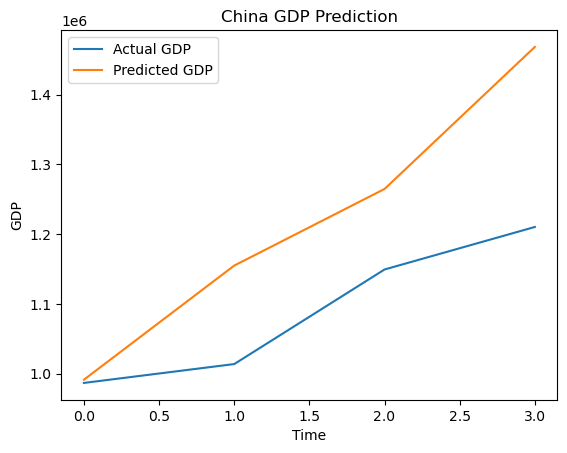

In [10]:
from matplotlib import pyplot as plt

plt.plot(target[29:], label='Actual GDP')
plt.plot(predicted_gdp, label='Predicted GDP')
plt.title('China GDP Prediction')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

# 统计信息

In [25]:
model_type = 'RF'

In [26]:
colu = ['MODEL_TYPE', 'MAE', 'MSE', 'RMSE', 'R²']
statistics = pd.DataFrame(data=[[model_type, mae, mse, rmse, r2]], columns=colu)

In [28]:
statistics.to_csv('../../output/statistics.csv')